<a href="https://colab.research.google.com/github/Srikhanth14/Spam_Model/blob/main/Spam_Email_Detection_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**

### In our daily email usage, spam messages clutter our inboxes, causing annoyance and security concerns. To address this issue, we present a project focused on building a Spam Email Detector using Python and machine learning. The goal is to create a tool that can automatically classify incoming emails as either spam or legitimate.

## **Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection & Pre-Processing**

In [ ]:
# Loading the dataset
df_Mail = pd.read_csv("Spam_Email_Detection.csv")

In [ ]:
#Displaying first five rows of the dataset
df_Mail.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Dropping the irrelevant Columns
df_Mail.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1, inplace=True)

In [ ]:
df_Mail.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#displaying no of rows and columns
df_Mail.shape

(5572, 2)

In [ ]:
print("Number of rows: ", df_Mail.shape[0])
print("Number of columns: ", df_Mail.shape[1])

Number of rows:  5572
Number of columns:  2


In [ ]:
# Renaming the columns
df_Mail.rename(columns={'v1':'Category', 'v2':'Message'}, inplace=True)
df_Mail

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#Checking for Null values
df_Mail.isnull().sum()

Category    0
Message     0
dtype: int64

## **Converting Categorical Values to Numeric**

**ham ---> 0**

**spam ---> 1**

In [ ]:
# Mapping Category values to numerical representations
df_Mail['Category'] = df_Mail['Category'].map({'ham': 0, 'spam': 1}).astype(int)

In [ ]:
df_Mail.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Data Visualization**

In [ ]:
df_Mail.Category.value_counts()

0    4825
1     747
Name: Category, dtype: int64

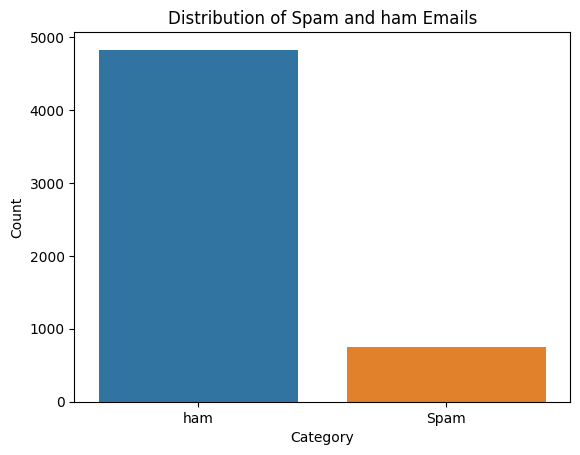

In [ ]:
sns.countplot(data=df_Mail, x='Category')
plt.title('Distribution of Spam and ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['ham', 'Spam'], rotation=0)
plt.show()

## **Splitting the Feature and Target**

In [ ]:
X = df_Mail['Message']   #Feature
Y = df_Mail['Category']  #Target Feature

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape ,X_test.shape)

(5572,) (4457,) (1115,)


## **Feature Extraction**


It is the Process of converting the text to numerical format by using TfidfVectorizer


In [ ]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [ ]:
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train_features)

  (0, 6546)	0.29071829686789585
  (0, 5242)	0.5087678982336444
  (0, 3995)	0.4050685955975014
  (0, 6054)	0.5665799184805557
  (0, 5152)	0.4141795823412651
  (1, 2110)	0.3523355719340784
  (1, 1422)	0.5940444343697558
  (1, 6838)	0.4124100686677272
  (1, 3131)	0.5940444343697558
  (2, 3554)	0.40508027557608417
  (2, 5879)	0.440107047813195
  (2, 4125)	0.440107047813195
  (2, 2835)	0.3382880530026162
  (2, 6313)	0.440107047813195
  (2, 2251)	0.3104925886287087
  (2, 3894)	0.20972094634778068
  (3, 2099)	0.17844687987159058
  (3, 7168)	0.28129970448786135
  (3, 1759)	0.24318982169280032
  (3, 6600)	0.21149129299817848
  (3, 6443)	0.2757459369495024
  (3, 7023)	0.20778003855703964
  (3, 4848)	0.26065216228925076
  (3, 2244)	0.2952940810054529
  (3, 5158)	0.3101287179133671
  :	:
  (4451, 4339)	0.5653315538937795
  (4452, 6835)	0.8442476281269602
  (4452, 3988)	0.5359533024452802
  (4453, 7211)	0.3927126429320925
  (4453, 4619)	0.3513960490954625
  (4453, 4483)	0.36145784624804855
  (4453,

### Y_train is already in the form of Numerical so we don't need to perform feature Extraction in the Y_train Feature

## **Model Selection and Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [ ]:
# Train a Logistic Regression model
Model = LogisticRegression()
Model.fit(X_train_features, Y_train)

LogisticRegression()

## **Model Evaluation**

In [ ]:
# Make predictions using train data
Y_train_pred = Model.predict(X_train_features)

In [ ]:
#accuracy scores using train Data
accuracy_train_Model= accuracy_score(Y_train, Y_train_pred)
print("Train Accuracy:", accuracy_train_Model)

Train Accuracy: 0.971729863136639


In [ ]:
# Make predictions using test data
Y_test_pred = Model.predict(X_test_features)

In [ ]:
#accuracy scores using test Data
accuracy_test_Model= accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", accuracy_test_Model)

Test Accuracy: 0.9551569506726457


In [ ]:
# Define a function to calculate precision, recall, and F1-score
def precision_recall_f1_score(true_labels, pred_labels):
  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =', precision_value)
  print('Recall =', recall_value)
  print('F1 Score =', f1_score_value)


In [ ]:
# Classification metrics for training data
print("Metrics for Training Data:")
precision_recall_f1_score(Y_train, Y_train_pred)

Metrics for Training Data:
Precision = 0.9936034115138592
Recall = 0.7911714770797963
F1 Score = 0.8809073724007561


In [ ]:
# Classification metrics for testing data
print("Metrics for Testing Data:")
precision_recall_f1_score(Y_test, Y_test_pred)

Metrics for Testing Data:
Precision = 1.0
Recall = 0.6835443037974683
F1 Score = 0.8120300751879699


## **Building a Predictive System**

In [ ]:
# Input email text
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
# Convert text to feature vectors using the same TF-IDF vectorizer
input_data_features = tfidf_vectorizer.transform(input_mail)
# Making a prediction
prediction = Model.predict(input_data_features)
print(prediction)

[1]


In [ ]:
# Print the prediction
if prediction[0] == 1:
  print("Predicted Label: Spam mail")
else:
  print("Predicted Label: Ham mail")

Predicted Label: Spam mail


# **Saving the Model**

In [ ]:
#importing pickle
import pickle as pic

In [ ]:
# Saving the TF-IDF vectorizer
filename= 'tfidfvectorizer.sav'
pic.dump(tfidf_vectorizer, open(filename, 'wb'))

# Loading the TF-IDF vectorizer
loaded_tfidfvectorizer = pic.load(open(filename, 'rb'))

# Saving the model
filename1= 'spam_email_trained_model.sav'
pic.dump(Model, open(filename1, 'wb'))

# Loading the model
loaded_model = pic.load(open(filename1, 'rb'))

# Input email text
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# Convert text to feature vectors using the loaded TF-IDF vectorizer
input_data_features = loaded_tfidfvectorizer.transform(input_mail)

# Making a prediction
prediction = loaded_model.predict(input_data_features)

# Print the prediction
if prediction[0] == 1:
    print("Predicted Label: Spam mail")
else:
    print("Predicted Label: Ham mail")


Predicted Label: Spam mail


## **Project Summary**

## In this project, we embark on creating a powerful Python-based Spam Email Detector using machine learning. Our primary goal is to develop a tool capable of automatically classifying incoming emails as either spam or legitimate. The journey begins with the preparation of a meticulously labeled dataset, setting the stage for training a machine learning model. Through this model, we empower the system to distinguish spam from non-spam emails effectively.

## Taking a step further, we leverage the simplicity and interactivity of Streamlit to transform our model into a user-friendly web application. This Streamlit-based web app serves as a practical deployment platform, providing an intuitive interface for users to interact with our spam detection system seamlessly. The app enhances email management by efficiently filtering out unwanted spam messages, ultimately improving overall communication experiences.

## Explore the app [here](https://spam-email-prediction.streamlit.app/)